In [1]:
#Getting everything set up properly
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
#Now we need to import our data set of images
#x is our images and y is our lables
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_images = x_train
train_lables = y_train
test_images = x_test
test_lables = y_test

In [22]:
train_images.shape

(60000, 28, 28)

In [41]:
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

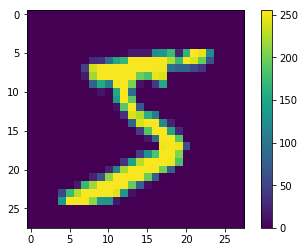

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid=False

In [30]:
#At this point I am resizing the image so that the range of these values is from zero to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

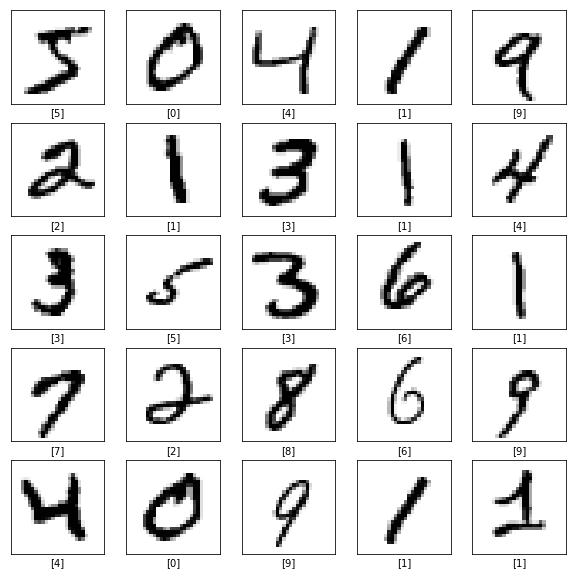

In [44]:

    
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid=False
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel([train_lables[i]])
    

At this point we are now setting up the layers for our nural network. We can see that there are a total of three layers. The first consists of 784 nodes, it essentially just takes the basic 28*28 image and flattens it out into one big vector. The next layter, which in this network is the only hidden layer, consist of 128 nodes, the dense layer simply means that it is able to learn from itself. The final layer consist of 10 nodes which have a value telling us how sure it is of a prediction at that specific area. 


In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [48]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Now we are going to go ahead and strat training the model. The steps that this requires are:
1- Feed the training data to the model—in this example, the train_images and train_labels arrays.
2- The model learns to associate images and labels.
3- We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

Basically what this means is that we are going to go ahead and call the model.fit method, where the model will fit to the training data. We can specify the amnmount of epics we want to use by thge epocs= setting. 

In [49]:
model.fit(train_images, train_lables, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2611 - acc: 0.9253
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1140 - acc: 0.9661
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0781 - acc: 0.9771
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0570 - acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0443 - acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0349 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0277 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0234 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0176 - acc: 0.9947
Epoch 10/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0159 - acc: 0.995

Now that we have trained our model we are going to test it using the other 10,000 images. This happens by feeeding it the tes_images and test_lables datasets and then giving us the the acurracy that it got correct. 

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_lables)
print('Test accuracy;', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy; 0.9801


So we can see that our model had an accuracy of 98% which is pretty impressive.

In [53]:
predictions = model.predict(test_images)

In [55]:
print (predictions[0])
np.argmax(predictions[0])

[1.1326205e-08 6.0863325e-10 3.4012576e-08 3.8287385e-06 1.4593676e-16
 4.1420961e-10 1.8265798e-15 9.9999392e-01 2.1646942e-08 2.0904579e-06]


7

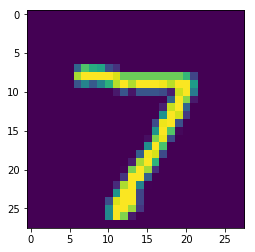

In [59]:
#We can see that the model is pretty sure that the first number in the test_images is a 7, why dont we check
plt.imshow(test_images[0])

So this is all really cool. But what if we changed the structure of our nural network? How would that affect our results??

In [61]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [62]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [65]:
model.fit(train_images, train_lables, epochs=25)


Epoch 1/25
60000/60000 [==============================] - 4s 74us/step - loss: 0.0047 - acc: 0.9987
Epoch 2/25
60000/60000 [==============================] - 4s 72us/step - loss: 0.0062 - acc: 0.9981
Epoch 3/25
60000/60000 [==============================] - 4s 71us/step - loss: 0.0055 - acc: 0.9983
Epoch 4/25
60000/60000 [==============================] - 4s 71us/step - loss: 0.0044 - acc: 0.9986
Epoch 5/25
60000/60000 [==============================] - 4s 70us/step - loss: 0.0048 - acc: 0.9986
Epoch 6/25
60000/60000 [==============================] - 5s 76us/step - loss: 0.0050 - acc: 0.9984
Epoch 7/25
60000/60000 [==============================] - 4s 74us/step - loss: 0.0030 - acc: 0.9990
Epoch 8/25
60000/60000 [==============================] - 4s 72us/step - loss: 0.0061 - acc: 0.9981
Epoch 9/25
60000/60000 [==============================] - 4s 68us/step - loss: 0.0040 - acc: 0.9987
Epoch 10/25
60000/60000 [==============================] - 4s 70us/step - loss: 0.0036 - acc: 0.9989

In [66]:
test_loss, test_acc = model.evaluate(test_images, test_lables)
print('Test accuracy;', test_acc)

10000/10000 [==============================] - 0s 40us/step
Test accuracy; 0.9802
